# Data Science Final Project - Mental Health in Tech

### Intro

We used the dataset here https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

### Content in this notebook
Each item is a link that allows you to jump ahead:
1. [Data Acquisition](#Data_Acquisition)
2. [Data Exploration](#Data_Exploration)
3. [Data Processing](#Data_Processing)
4. [Data Modeling](#Data_Modeling)
5. [Validation](#Validation)




STILL NEEED TO DO
1. Heatmap
2. AUC validation for logistic regression or cross validation


## 1. Data Acquisition   <a id="Data_Acquisition"></a> 

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
import dc_stat_think as  dcst 
import itertools
from sklearn.preprocessing import OrdinalEncoder

ModuleNotFoundError: No module named 'dc_stat_think'

In [90]:
df = pd.read_csv("survey.csv")

## 2. Data Exploration <a id="Data_Exploration"/>

In [91]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [92]:
df.describe(include ="all")

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df.value_counts(subset="Gender")

Gender
Male                     989
Female                   251
Gender non-conforming     11
dtype: int64

## 3. Data Processing  <a id="Data_Processing" /> 

In [94]:
#Cleaning gender column
female_names = {'Female ','f','female', 'F', 'Woman', 'Female', 'femail', 'cis-female/femme', 'Trans-female', 'Cis Female', 'Femake', 'Female (cis)', 'Trans woman','woman', "Female (trans)" }
male_names = {'Male', 'Male ', 'male', 'M', 'm', 'Make', 'Male-ish', 'Man', 'Cis Male', 'maile', 'msle', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'Male (CIS)', 'Mal', 'Mail', 'Guy (-ish) ^_^', 'Cis Man', 'something kinda male?'}
non_names = {'Agender', 'All', 'Androgyne', 'Enby', 'Genderqueer', 'Nah', 'male leaning androgynous', 'fluid', 'Neuter', 'non-binary', 'queer', 'queer/she/they'}
df.replace(to_replace = female_names, value = "Female", inplace=True)
df.replace(to_replace = male_names, value = "Male", inplace=True)
df.replace(to_replace = non_names, value = "Gender non-conforming", inplace=True)
#print(df)

In [95]:
df.value_counts(subset="Gender")

Gender
Male                     994
Female                   251
Gender non-conforming     12
A little about you         1
p                          1
dtype: int64

In [96]:
#delete p and a little about you 
df.drop(df.loc[df["Gender"] == "p"].index, inplace = True)
df.drop(df.loc[df["Gender"] == "A little about you"].index, inplace = True)

In [97]:
df.value_counts(subset="Gender")

Gender
Male                     994
Female                   251
Gender non-conforming     12
dtype: int64

In [98]:
df.drop(df.loc[df["Age"] > 100].index, inplace = True)
df.drop(df.loc[df["Age"] < 18].index, inplace = True)
df.value_counts(subset="Age")

Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
20     6
48     6
50     6
51     5
56     4
49     4
57     3
55     3
54     3
47     2
60     2
53     1
58     1
61     1
62     1
65     1
72     1
dtype: int64

In [133]:
#ENCODING OF COLUMNS TO PERFORM CLASSIFICATION
categorical_cols = [ 'Gender', 'self_employed',
       'family_history', 'treatment', 'work_interfere',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
binary_categories = []
for i in categorical_cols: 
    if(len(df.value_counts(subset=i)) == 2): binary_categories.append(i)
#binary_categories = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'obs_consequence']

#ENCODING OF COLUMNS TO PERFORM CLASSIFICATION
df_encoded = df.copy()
df_encoded = df_encoded[categorical_cols]
df_encoded = df_encoded.dropna()
#encode binary columns as 0 or 1
data_encoding = {"Yes": 1, "No": 0} 
for i in binary_categories: 
    df_encoded[i] = df_encoded[i].replace(data_encoding)

df_encoded = pd.get_dummies(df_encoded)
#df_encoded.head()
#print(df_encoded.columns)

[]

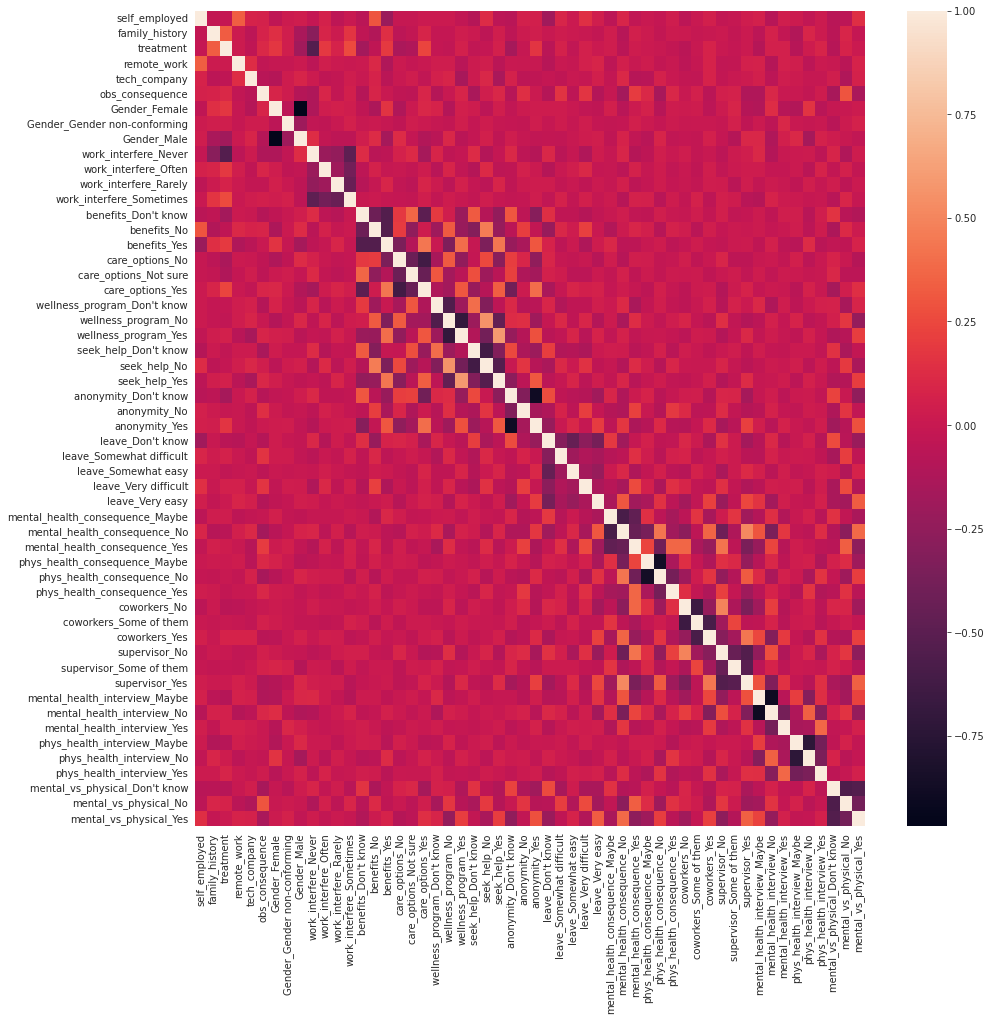

In [137]:
#CREATING HEATMAP
plt.figure(figsize=(15, 15))
corr_fig = df_encoded.corr()
#corr_fig.head()
sns.heatmap(df_heatmap.corr())
plt.plot()

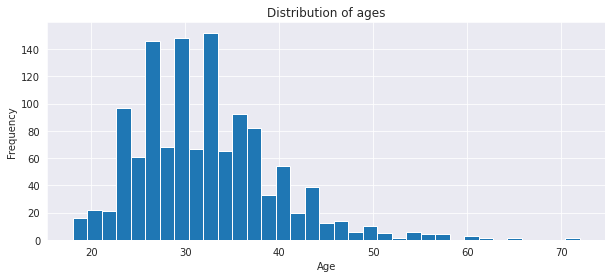

In [99]:
#df.plt.hist(column = 'Age', bins= int(np.sqrt(len(df['Age']))))
sns.set_style("darkgrid")
plt.figure(figsize=(10, 4))
plt.hist(df['Age'], bins= int(np.sqrt(1275)))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of ages")
plt.show()

In [100]:
#df.set_index('benefits').plot(kind='bar', stacked=True, color=['green', 'red'])

<AxesSubplot:xlabel='supervisor', ylabel='count'>

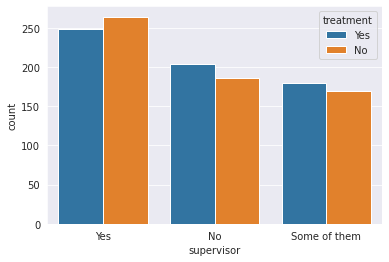

In [101]:
sns.countplot(data=df, x='supervisor', hue='treatment')

Making stacked bar plot

In [102]:
data_chart = df[['treatment','seek_help', 'coworkers', 'supervisor', 'care_options' ]] 
data_encoding = {'Yes': 1, 'No': 2, 'Some of them': 3, "Don't know": 4, 'Not sure': 4} 
# dont know and not sure are treated the same
for i in data_chart.columns: 
    data_chart[i] = data_chart[i].replace(data_encoding)
    
data_chart.head()

/tmp/ipykernel_177/343390375.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chart[i] = data_chart[i].replace(data_encoding)


,treatment,seek_help,coworkers,supervisor,care_options
0,1,1,3,1,4
1,2,4,2,2,2
2,2,2,1,1,2
3,1,2,3,2,1
4,2,4,3,1,2


In [103]:
frequencies = {}
for i in data_chart.columns: 
    frequencies[i] = data_chart[i].value_counts()
    
plotdata = pd.DataFrame(frequencies)
plotdata.fillna(0, inplace=True)

plotdata = plotdata.transpose()
plotdata_percent = plotdata.div(plotdata.sum(axis=1), axis = 0)*100
plotdata.head()
plotdata_percent.head()

,1,2,3,4
treatment,50.519584,49.480416,0.000000,0.000000
seek_help,19.744205,51.239009,0.000000,29.016787
coworkers,17.745803,20.623501,61.630695,0.000000
supervisor,40.927258,31.175060,27.897682,0.000000
care_options,35.091926,39.888090,0.000000,25.019984


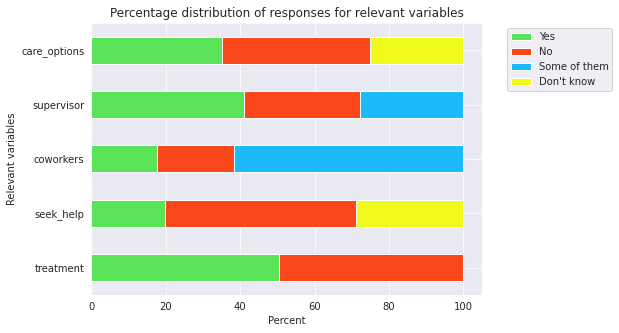

In [104]:
data_colors= {1: '#5ae258', 2: '#fa471b',3: '#1bbafa',  4: '#f0fa1b'} 

plotdata_percent.plot(kind='barh', stacked=True, color=data_colors, figsize=(7, 5))
plt.legend(data_encoding, bbox_to_anchor = (1.05, 1))
plt.title("Percentage distribution of responses for relevant variables")
plt.ylabel("Relevant variables")
plt.xlabel("Percent")
plt.show()

In [139]:
# Bootstrapping something
series1 = df.loc[(df["treatment"] == 'Yes')].Age
series2 = df.loc[(df["treatment"] == 'No')].Age
series1 = series1[:619]
print(series1)
print(series2)



# Compute mean of all forces: 
empirical_diff_means = np.mean(series1) - np.mean(series2)
series_conc = np.concatenate((series1, series2))
mean_force = np.median(series_conc)


# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = dcst.draw_bs_pairs(series1, series2, dcst.diff_of_means, size = 10000)
bs_replicates_b = dcst.draw_bs_pairs(series1, series2, dcst.diff_of_means, size = 10000)



# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates <= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)



0       37
3       31
6       35
8       42
10      31
        ..
1235    23
1236    60
1238    28
1240    31
1241    31
Name: Age, Length: 619, dtype: int64
1       44
2       32
4       31
5       33
7       39
        ..
1239    30
1244    32
1246    32
1253    36
1257    46
Name: Age, Length: 619, dtype: int64


NameError: name 'dcst' is not defined

In [140]:
plt.hist(bs_replicates_a, bins = 10)
plt.title("Bootstrap Replicates of Candidates Seeking Treatment according to their Age")
plt.show()
plt.hist(bs_replicates_b, bins = 10)
plt.title("Bootstrap Replicates of Candidates Not Seeking Treatment according to their Age")
plt.show()


NameError: name 'bs_replicates_a' is not defined

## 4. Data modeling   <a id="Data_Modeling" />

## Chi square test
H0: treatment and var are independent  
H1: dependent  
Benefits = "Does your employer provide mental health benefits?"  
Treatment = "Have you sought treatment for a mental health condition?"  

In [105]:
#EDA of correlation between the two vars
proportions = df.groupby('treatment')['benefits'].value_counts(normalize=True)
wide_props = proportions.unstack()
print(wide_props)

benefits   Don't know        No       Yes
treatment                                
No           0.413570  0.310178  0.276252
Yes          0.238924  0.283228  0.477848


In [106]:
print(df.columns)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [107]:
confidence = 0.05
variables_chi = ["benefits", "family_history", "no_employees", "work_interfere" , "remote_work", "tech_company", "coworkers", "supervisor", "obs_consequence" ]
all_vars = ['Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
for pred in all_vars: 
    expected, observed, stats = pingouin.chi2_independence(data=df, x=pred, y="treatment")
    #index into dataframe and reject automatically
    print("Predicting : " + str(pred))
    print("P-value: " , stats.iloc[0].pval)
    if stats.iloc[0].pval < confidence: print("Reject null: dependent")
    else: print("Accept null: independent")
    print()
#print((stats))

Predicting : Age
P-value:  0.5739123628200156
Accept null: independent

Predicting : Gender
P-value:  3.2656675957839555e-11
Reject null: dependent

Predicting : Country
P-value:  0.014787434897197116
Reject null: dependent

Predicting : state
P-value:  0.2057654328823857
Accept null: independent



/home/corderito/anaconda3/envs/introds/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/home/corderito/anaconda3/envs/introds/lib/python3.9/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/home/corderito/anaconda3/envs/introds/lib/python3.9/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/corderito/anaconda3/envs/introds/lib/python3.9/site-packages/scipy/stats/stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/home/corderito/anaconda3/envs/introds/lib/python3.9/site-packages/scipy/stats/stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f

Predicting : self_employed
P-value:  0.6234628977236123
Accept null: independent

Predicting : family_history
P-value:  3.703610823400622e-40
Reject null: dependent

Predicting : work_interfere
P-value:  1.1262718341798323e-62
Reject null: dependent

Predicting : no_employees
P-value:  0.11651403407114981
Accept null: independent

Predicting : remote_work
P-value:  0.38123511520401465
Accept null: independent

Predicting : tech_company
P-value:  0.28158916071643547
Accept null: independent

Predicting : benefits
P-value:  1.4736130252077323e-14
Reject null: dependent

Predicting : care_options
P-value:  6.66909669045227e-21
Reject null: dependent

Predicting : wellness_program
P-value:  0.004931213409904347
Reject null: dependent

Predicting : seek_help
P-value:  0.004716471768491379
Reject null: dependent

Predicting : anonymity
P-value:  2.3651317580178443e-06
Reject null: dependent

Predicting : leave
P-value:  8.268896929445606e-06
Reject null: dependent

Predicting : mental_health

# Logistic Regression

In [108]:
df.value_counts(subset="obs_consequence")

obs_consequence
No     1070
Yes     181
dtype: int64

In [109]:
logreg_cols = ["treatment","benefits", "family_history", "work_interfere", "coworkers", "obs_consequence"]
all_dep_cols = ["treatment", "Gender", "family_history", "work_interfere", "coworkers", "obs_consequence", "benefits", "care_options", "wellness_program", "seek_help", "anonymity", "leave", "mental_health_interview", "mental_vs_physical" ]


In [110]:
#ENCODING OF COLUMNS TO PERFORM CLASSIFICATION
df_encoded = df.copy()
df_encoded = df_encoded[logreg_cols]
df_encoded = df_encoded.dropna()
data_encoding = {"Yes": 1, "No": 0}  
#encode binary columns as 0 or 1
df_encoded["treatment"] = df_encoded["treatment"].replace(data_encoding)
df_encoded["family_history"] = df_encoded["family_history"].replace(data_encoding)
df_encoded["obs_consequence"] = df_encoded["obs_consequence"].replace(data_encoding)

df_encoded = pd.get_dummies(df_encoded)
df_encoded.drop(columns =["benefits_No", "work_interfere_Never", "coworkers_No"], inplace= True) #these can be infered
df_encoded.head()

,treatment,family_history,obs_consequence,benefits_Don't know,benefits_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,coworkers_Some of them,coworkers_Yes
0,1,0,0,0,1,1,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1
3,1,1,1,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,1,0


In [41]:
#num_vars= 9 #number of predictors in logistic regression
pred_cols = ['family_history', 'obs_consequence', 'benefits_Don\'t know',
       'benefits_Yes', 'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'coworkers_Some of them', 'coworkers_Yes']
x_logreg = df_encoded[pred_cols]
y_logreg = df_encoded['treatment']


# Split into test and train
x_train, x_test, y_train, y_test = train_test_split(x_logreg, y_logreg, test_size=0.40, random_state=0)

# Fit and predict the model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8131313131313131
Precision: 0.78839590443686
Recall: 0.9506172839506173


[]

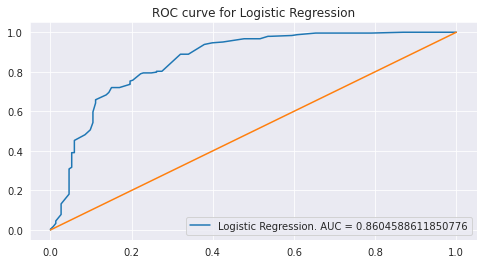

In [57]:
#AUC curve for Logistic Regression
pred_lr = logreg.decision_function(x_test) #prediction 1 to use
false_pos_lr, true_pos_lr, thresh_lr = metrics.roc_curve(y_test, pred_lr) #pred and y_test
auc_lr = metrics.roc_auc_score(y_test, pred_lr)

#plot ROC curves for logistic regression
plt.figure(figsize=(8, 4))
plt.plot(false_pos_lr, true_pos_lr, label = "Logistic Regression. AUC = " + str(auc_lr))
plt.plot([0,1], [0,1])
plt.title("ROC curve for Logistic Regression")
plt.legend()
plt.plot()

In [73]:
# K FOLD CROSS VALIDATION
#mse = metrics.make_scorer(metrics.mean_squared_error)
folds = KFold(n_splits=10, random_state=1, shuffle=True)
# Set up cross_val_score
cv = cross_val_score(estimator=logreg,
                     X=x_train,
                     y=y_train,
                     cv=folds,
                     scoring='accuracy')

# Print the mean error
print(cv)
print("Mean of the cross validation scores in logistic regression model is: ", cv.mean())
print("Standard dev of the cross validation scores in logistic regression model is: ", cv.std())

KFold(n_splits=10, random_state=1, shuffle=True)
[0.78333333 0.8        0.75       0.84745763 0.76271186 0.76271186
 0.79661017 0.77966102 0.74576271 0.81355932]
Mean of the cross validation scores in logistic regression model is:  0.7841807909604519
Standard dev of the cross validation scores in logistic regression model is:  0.02976414678084826


Accuracy of prediction for new unseen data is 0.78

In [74]:
# LOGISTIC REGRESSION CROSS VALIDATION ANALYSIS
#like in week 10 notebook, but instead plot number of classifiers against auc score